# Amazon Electronics Review Analysis

## I. Data Wrangling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import scipy
import itertools
import nltk
nltk.download('punkt')
from nltk import sent_tokenize
from nltk import wordpunct_tokenize, WordNetLemmatizer, pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
from textblob import TextBlob, Word

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mythr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
reviews1 = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')

In [4]:
reviews1.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [5]:
reviews1.shape

(5000, 24)

In [6]:
reviews2 = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [7]:
reviews2.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [8]:
reviews2.shape

(28332, 24)

In [9]:
reviews3 = pd.read_csv('7817_1.csv')

In [10]:
reviews3.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [11]:
reviews3.shape

(1597, 27)

In [12]:
reviews1.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [13]:
reviews2.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [14]:
reviews3.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')

In [15]:
# the third dataset has colors and sizes as columns, I am going to see if there's any relevant info, then drop it if there's too 
#many NaN
reviews3['colors'].unique()

array([nan, 'GB', 'Black', 'Clear'], dtype=object)

In [16]:
reviews3.isna().sum()

id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64

In [17]:
reviews1.isna().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
categories                0
primaryCategories         0
imageURLs                 0
keys                      0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateAdded      3948
reviews.dateSeen          0
reviews.doRecommend       0
reviews.id             4971
reviews.numHelpful        0
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title            13
reviews.username          0
sourceURLs                0
dtype: int64

When observing the data, the most important columns we need are rating, review text and title, category, number of helpful reviews, and if the product is recommended. What I plan to do is drop the unnecessary columns from each dataset then condense it down, so that I can perform EDA.

In [18]:
reviews1 = reviews1.drop(['dateAdded', 'dateUpdated', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.id', 'reviews.sourceURLs', 'reviews.username', 'imageURLs', 'keys', 'sourceURLs'], axis=1)

In [19]:
reviews1.isna().sum()

id                      0
name                    0
asins                   0
brand                   0
categories              0
primaryCategories       0
manufacturer            0
manufacturerNumber      0
reviews.date            0
reviews.doRecommend     0
reviews.numHelpful      0
reviews.rating          0
reviews.text            0
reviews.title          13
dtype: int64

In [20]:
#let's replace nan values with a string that says "no Title"
reviews1['reviews.title'].fillna('No Title', inplace=True)

In [21]:
reviews1.isna().sum()

id                     0
name                   0
asins                  0
brand                  0
categories             0
primaryCategories      0
manufacturer           0
manufacturerNumber     0
reviews.date           0
reviews.doRecommend    0
reviews.numHelpful     0
reviews.rating         0
reviews.text           0
reviews.title          0
dtype: int64

In [22]:
#replace the period in column names with an underscore
reviews1.rename(columns = {'reviews.date':'reviews_date', 'reviews.doRecommend':'reviews_doRecommend', 'reviews.rating':'reviews_rating', 'reviews.numHelpful': 'reviews_numHelpful', 'reviews.text': 'reviews_text', 'reviews.title': 'reviews_title'}, inplace = True)

In [23]:
reviews1.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'primaryCategories',
       'manufacturer', 'manufacturerNumber', 'reviews_date',
       'reviews_doRecommend', 'reviews_numHelpful', 'reviews_rating',
       'reviews_text', 'reviews_title'],
      dtype='object')

In [24]:
reviews1.shape

(5000, 14)

In [25]:
#let's clean up the second dataframe so we can put these together and randomly sample them
reviews2.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [26]:
reviews2.isna().sum()

id                         0
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
brand                      0
categories                 0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturer               0
manufacturerNumber         0
reviews.date               0
reviews.dateSeen           0
reviews.didPurchase    28323
reviews.doRecommend    12246
reviews.id             28291
reviews.numHelpful     12217
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title              0
reviews.username           0
sourceURLs                 0
dtype: int64

In [27]:
#all nan rows should be dropped in the doRecommend column because It will mess with the creation of dummy variables in the future
reviews2['reviews.doRecommend'].unique()

array([nan, True, False], dtype=object)

In [28]:
reviews2['reviews.numHelpful'].unique()

array([ nan,   1.,   0.,   2.,  40.,  21.,  12., 238.,   6.,   3.,   9.,
        15.,   5., 434.,   8.,   7.,   4.,  16., 621.,  23., 220.,  19.,
        39.,  18.,  72.,  25.,  11.,  27.,  45.,  20.,  10.,  65.,  28.,
        68., 105., 103.,  33.,  48.,  14.,  49.,  13.,  44.,  36., 129.,
        17.,  26., 130.,  35.,  29.,  30.,  22.,  31.,  41.,  93.,  60.,
       292., 345., 525., 288.,  47.,  42.,  55.])

In [29]:
#drop the columns we dropped in the first dataframe
reviews2 = reviews2.drop(['dateAdded', 'dateUpdated', 'reviews.dateSeen', 'reviews.id', 'reviews.sourceURLs', 'reviews.username', 'reviews.didPurchase', 'imageURLs', 'keys', 'sourceURLs'], axis=1)

In [30]:
reviews2.head()

,id,name,asins,brand,categories,primaryCategories,manufacturer,manufacturerNumber,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title
0,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,NaN,NaN,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,NaN,NaN,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,NaN,NaN,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,NaN,NaN,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,NaN,NaN,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...


In [31]:
reviews2 = reviews2[reviews2['reviews.doRecommend'].notna()]

In [32]:
reviews2 = reviews2[reviews2['reviews.numHelpful'].notna()]

In [33]:
reviews2.isna().sum()

id                     0
name                   0
asins                  0
brand                  0
categories             0
primaryCategories      0
manufacturer           0
manufacturerNumber     0
reviews.date           0
reviews.doRecommend    0
reviews.numHelpful     0
reviews.rating         0
reviews.text           0
reviews.title          0
dtype: int64

In [34]:
#replace the period in column names with an underscore
reviews2.rename(columns = {'reviews.date':'reviews_date', 'reviews.doRecommend':'reviews_doRecommend', 'reviews.rating':'reviews_rating', 'reviews.numHelpful': 'reviews_numHelpful', 'reviews.text': 'reviews_text', 'reviews.title': 'reviews_title'}, inplace = True)

In [35]:
reviews2.head()

,id,name,asins,brand,categories,primaryCategories,manufacturer,manufacturerNumber,reviews_date,reviews_doRecommend,reviews_numHelpful,reviews_rating,reviews_text,reviews_title
8350,AWYAV-i9Iwln0LfXqrUq,Echo Spot Pair Kit (Black),B073SQYXTW,Amazon,"Amazon Echo,Networking,Home & Tools,Smart Home...",Electronics,Amazon,B073SQYXTW,2018-12-07T18:14:33.000Z,True,0.0,4,"ASIDE FROM THE FACT THAT THE SCREEN IS SMALL, ...",ALEXA ENABLED DEVICE WITH SCREEN.
8351,AWYAV-i9Iwln0LfXqrUq,Echo Spot Pair Kit (Black),B073SQYXTW,Amazon,"Amazon Echo,Networking,Home & Tools,Smart Home...",Electronics,Amazon,B073SQYXTW,2018-12-04T18:35:15.000Z,True,0.0,5,"I wasn't sure I even wanted this item, but cau...",Gotta have this one!!
12167,AVpfIfGA1cnluZ0-emyp,Amazon 9W PowerFast Official OEM USB Charger a...,B00QFQRELG,Amazon,"Computers & Accessories,Tablet & E-Reader Acce...",Electronics,Amazon,55-000662,2017-01-02T00:00:00.000Z,True,0.0,5,It seems to work just like any other usb plug ...,A charger
12168,AVpfIfGA1cnluZ0-emyp,Amazon 9W PowerFast Official OEM USB Charger a...,B00QFQRELG,Amazon,"Computers & Accessories,Tablet & E-Reader Acce...",Electronics,Amazon,55-000662,2016-06-03T00:00:00.000Z,True,2.0,5,got this for my kindle 7 tablet . Does an exce...,amazon power fast usb charger
12169,AVpfIfGA1cnluZ0-emyp,Amazon 9W PowerFast Official OEM USB Charger a...,B00QFQRELG,Amazon,"Computers & Accessories,Tablet & E-Reader Acce...",Electronics,Amazon,55-000662,2016-11-21T00:00:00.000Z,True,0.0,5,Best kindle charger ever. Took 30 minutes to b...,Amazon powerfast wall charger


In [36]:
reviews2.shape

(16086, 14)

In [37]:
reviews2.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'primaryCategories',
       'manufacturer', 'manufacturerNumber', 'reviews_date',
       'reviews_doRecommend', 'reviews_numHelpful', 'reviews_rating',
       'reviews_text', 'reviews_title'],
      dtype='object')

In [38]:
#do the same thing for reviews3 dataframe (might not be usable, but I still want to try)
reviews3.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')

In [39]:
#drop the columns we dropped in the first 2 dataframes
reviews3 = reviews3.drop(['colors', 'dateAdded', 'dateUpdated', 'dimension', 'ean', 'keys', 'prices', 'reviews.sourceURLs', 'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'reviews.username', 'sizes', 'upc', 'weight'], axis=1)

In [40]:
reviews3.shape

(1597, 13)

In [41]:
reviews3.columns

Index(['id', 'asins', 'brand', 'categories', 'manufacturer',
       'manufacturerNumber', 'name', 'reviews.date', 'reviews.doRecommend',
       'reviews.numHelpful', 'reviews.rating', 'reviews.text',
       'reviews.title'],
      dtype='object')

In [42]:
reviews3.rename(columns = {'reviews.date':'reviews_date', 'reviews.doRecommend':'reviews_doRecommend', 'reviews.rating':'reviews_rating', 'reviews.numHelpful': 'reviews_numHelpful', 'reviews.text': 'reviews_text', 'reviews.title': 'reviews_title'}, inplace = True)

In [43]:
reviews3.head()

,id,asins,brand,categories,manufacturer,manufacturerNumber,name,reviews_date,reviews_doRecommend,reviews_numHelpful,reviews_rating,reviews_text,reviews_title
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",Amazon,NaN,Kindle Paperwhite,2015-08-08T00:00:00.000Z,NaN,139.0,5.0,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!"
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",Amazon,NaN,Kindle Paperwhite,2015-09-01T00:00:00.000Z,NaN,126.0,5.0,Allow me to preface this with a little history...,One Simply Could Not Ask For More
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",Amazon,NaN,Kindle Paperwhite,2015-07-20T00:00:00.000Z,NaN,69.0,4.0,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",Amazon,NaN,Kindle Paperwhite,2017-06-16T00:00:00.000Z,NaN,2.0,5.0,I bought one of the first Paperwhites and have...,Love / Hate relationship
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",Amazon,NaN,Kindle Paperwhite,2016-08-11T00:00:00.000Z,NaN,17.0,5.0,I have to say upfront - I don't like coroporat...,I LOVE IT


In [44]:
reviews3.isna().sum()

id                        0
asins                     0
brand                     0
categories                0
manufacturer            632
manufacturerNumber      695
name                      0
reviews_date            380
reviews_doRecommend    1058
reviews_numHelpful      697
reviews_rating          420
reviews_text              0
reviews_title            17
dtype: int64

In [45]:
reviews3 = reviews3[reviews3['reviews_doRecommend'].notna()]
reviews3 = reviews3[reviews3['manufacturer'].notna()]
reviews3 = reviews3[reviews3['manufacturerNumber'].notna()]
reviews3 = reviews3[reviews3['reviews_doRecommend'].notna()]
reviews3 = reviews3[reviews3['reviews_date'].notna()]
reviews3 = reviews3[reviews3['reviews_numHelpful'].notna()]
reviews3 = reviews3[reviews3['reviews_rating'].notna()]
reviews3 = reviews3[reviews3['reviews_title'].notna()]

In [46]:
reviews3.shape

(539, 13)

I have ultimately decided to combine all three dataframes

In [47]:
frames = [reviews1, reviews2, reviews3]

In [48]:
df = pd.concat(frames)

In [49]:
df.shape

(21625, 14)

In [50]:
df.head()

,id,name,asins,brand,categories,primaryCategories,manufacturer,manufacturerNumber,reviews_date,reviews_doRecommend,reviews_numHelpful,reviews_rating,reviews_text,reviews_title
0,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,False,0.0,3.0,I thought it would be as big as small paper bu...,Too small
1,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,True,0.0,5.0,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach
2,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,Amazon,B00ZV9PXP2,2018-04-20T00:00:00.000Z,True,0.0,4.0,Didnt know how much i'd use a kindle so went f...,Great for the price
3,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,Amazon,B00ZV9PXP2,2017-11-02T17:33:31.000Z,True,3.0,5.0,I am 100 happy with my purchase. I caught it o...,A Great Buy
4,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,Amazon,B00ZV9PXP2,2018-04-24T00:00:00.000Z,True,0.0,5.0,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids


In [51]:
#get dummy variables for boolean values (whether or not the product is recommended)
recommendation = pd.get_dummies(df['reviews_doRecommend'])

In [52]:
print(recommendation)

      False  True 
0         1      0
1         0      1
2         0      1
3         0      1
4         0      1
...     ...    ...
1389      0      1
1390      0      1
1391      0      1
1392      0      1
1393      0      1

[21625 rows x 2 columns]


In [53]:
recommendation.columns = ['not_recommended', 'recommended']

In [54]:
recommendation.head()

,not_recommended,recommended
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [55]:
df = pd.concat([df, recommendation], axis=1)

In [56]:
df.head()

,id,name,asins,brand,categories,primaryCategories,manufacturer,manufacturerNumber,reviews_date,reviews_doRecommend,reviews_numHelpful,reviews_rating,reviews_text,reviews_title,not_recommended,recommended
0,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,False,0.0,3.0,I thought it would be as big as small paper bu...,Too small,1,0
1,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,True,0.0,5.0,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,0,1
2,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,Amazon,B00ZV9PXP2,2018-04-20T00:00:00.000Z,True,0.0,4.0,Didnt know how much i'd use a kindle so went f...,Great for the price,0,1
3,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,Amazon,B00ZV9PXP2,2017-11-02T17:33:31.000Z,True,3.0,5.0,I am 100 happy with my purchase. I caught it o...,A Great Buy,0,1
4,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,Amazon,B00ZV9PXP2,2018-04-24T00:00:00.000Z,True,0.0,5.0,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,0,1


In [57]:
#clean up descriptive values
df['primaryCategories'].unique()

array(['Electronics', 'Electronics,Hardware',
       'Office Supplies,Electronics', 'Electronics,Media',
       'Electronics,Furniture', 'Toys & Games,Electronics', nan],
      dtype=object)

All of the products in the dataframe are considered electronics, but the primaryCategories section seems to be too broad and the product names are too long as well, so I am going to use natural language processing and neural networks to create a new category for each product based on the product name

In [58]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from keras.layers import Flatten
from keras.layers import MaxPooling1D
from keras.models import Model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

In [59]:
#prepare for clustering based on product name
df['name'].unique()

array(['Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)',
       'Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen',
       'Amazon Fire TV with 4K Ultra HD and Alexa Voice Remote (Pendant Design) | Streaming Media Player',
       'Amazon - Echo Plus w/ Built-In Hub - Silver',
       'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case',
       'Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers',
       'Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Blue',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Blue',
       'Amazon Tap - Alexa-Enabled Portable Bluetooth Spe

In [60]:
len(df['name'].unique())

49

In [61]:
#let's drop the primaryCategories column so I can create new category names based on the names
df = df.drop('primaryCategories', axis=1)

In [62]:
df.head()

,id,name,asins,brand,categories,manufacturer,manufacturerNumber,reviews_date,reviews_doRecommend,reviews_numHelpful,reviews_rating,reviews_text,reviews_title,not_recommended,recommended
0,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,False,0.0,3.0,I thought it would be as big as small paper bu...,Too small,1,0
1,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,True,0.0,5.0,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,0,1
2,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2018-04-20T00:00:00.000Z,True,0.0,4.0,Didnt know how much i'd use a kindle so went f...,Great for the price,0,1
3,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2017-11-02T17:33:31.000Z,True,3.0,5.0,I am 100 happy with my purchase. I caught it o...,A Great Buy,0,1
4,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2018-04-24T00:00:00.000Z,True,0.0,5.0,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,0,1


In [63]:
df['name'].unique()

array(['Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)',
       'Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen',
       'Amazon Fire TV with 4K Ultra HD and Alexa Voice Remote (Pendant Design) | Streaming Media Player',
       'Amazon - Echo Plus w/ Built-In Hub - Silver',
       'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case',
       'Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers',
       'Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Blue',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Blue',
       'Amazon Tap - Alexa-Enabled Portable Bluetooth Spe

In [64]:
df['name'] = df.name.str.replace('"','')
df['name'] = df.name.str.replace('-','')
df['name'] = df.name.str.replace(',','')
df['name'] = df.name.str.replace('+','')
df['name'] = df.name.str.replace('(','')
df['name'] = df.name.str.replace(')','')
df['name'] = df.name.str.replace('w/','with')
df['name'] = df.name.str.lower()

In [65]:
df['name'].unique()

array(['amazon kindle ereader 6 wifi 8th generation 2016',
       'amazon echo show alexaenabled bluetooth speaker with 7 screen',
       'amazon fire tv with 4k ultra hd and alexa voice remote pendant design | streaming media player',
       'amazon  echo plus with builtin hub  silver',
       'amazon 9w powerfast official oem usb charger and power adapter for fire tablets and kindle ereaders',
       'fire kids edition tablet 7 display wifi 16 gb blue kidproof case',
       'kindle ereader  white 6 glarefree touchscreen display wifi  includes special offers',
       'fire tablet 7 display wifi 16 gb  includes special offers black',
       'fire kids edition tablet 7 display wifi 16 gb green kidproof case',
       'allnew fire hd 8 tablet 8 hd display wifi 16 gb  includes special offers blue',
       'allnew fire hd 8 tablet 8 hd display wifi 32 gb  includes special offers blue',
       'amazon tap  alexaenabled portable bluetooth speaker',
       'fire hd 10 tablet 10.1 hd display wi

In [66]:
df['tokenized_name'] = df['name'].apply(word_tokenize) 

In [67]:
df.head()

,id,name,asins,brand,categories,manufacturer,manufacturerNumber,reviews_date,reviews_doRecommend,reviews_numHelpful,reviews_rating,reviews_text,reviews_title,not_recommended,recommended,tokenized_name
0,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,False,0.0,3.0,I thought it would be as big as small paper bu...,Too small,1,0,"[amazon, kindle, ereader, 6, wifi, 8th, genera..."
1,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,True,0.0,5.0,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,0,1,"[amazon, kindle, ereader, 6, wifi, 8th, genera..."
2,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2018-04-20T00:00:00.000Z,True,0.0,4.0,Didnt know how much i'd use a kindle so went f...,Great for the price,0,1,"[amazon, kindle, ereader, 6, wifi, 8th, genera..."
3,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2017-11-02T17:33:31.000Z,True,3.0,5.0,I am 100 happy with my purchase. I caught it o...,A Great Buy,0,1,"[amazon, kindle, ereader, 6, wifi, 8th, genera..."
4,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2018-04-24T00:00:00.000Z,True,0.0,5.0,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,0,1,"[amazon, kindle, ereader, 6, wifi, 8th, genera..."


In [68]:
names = df['tokenized_name'].values

In [69]:
print(names)

[list(['amazon', 'kindle', 'ereader', '6', 'wifi', '8th', 'generation', '2016'])
 list(['amazon', 'kindle', 'ereader', '6', 'wifi', '8th', 'generation', '2016'])
 list(['amazon', 'kindle', 'ereader', '6', 'wifi', '8th', 'generation', '2016'])
 ...
 list(['amazon', 'tap', 'alexaenabled', 'portable', 'bluetooth', 'speaker'])
 list(['amazon', 'tap', 'alexaenabled', 'portable', 'bluetooth', 'speaker'])
 list(['amazon', 'tap', 'alexaenabled', 'portable', 'bluetooth', 'speaker'])]


In [70]:
def categ(tokens):
    if 'voyage' in tokens or 'ereader' in tokens:
        return 'E-Reader'
    elif 'charger' in tokens:
        return 'Charger'
    elif 'case' in tokens:
        return 'Cases' 
    elif 'tablet' in tokens:
        return 'Tablets' 
    elif 'echo' in tokens:
        return 'Personal Assistant'
    elif 'tap' in tokens:
        return 'Speaker'
    elif 'tv' in tokens:
        return 'Fire TV'
    else:
        return 'Other'
df['primary_category'] = df['tokenized_name'].apply(categ)

In [71]:
df.head()

,id,name,asins,brand,categories,manufacturer,manufacturerNumber,reviews_date,reviews_doRecommend,reviews_numHelpful,reviews_rating,reviews_text,reviews_title,not_recommended,recommended,tokenized_name,primary_category
0,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,False,0.0,3.0,I thought it would be as big as small paper bu...,Too small,1,0,"[amazon, kindle, ereader, 6, wifi, 8th, genera...",E-Reader
1,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,True,0.0,5.0,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,0,1,"[amazon, kindle, ereader, 6, wifi, 8th, genera...",E-Reader
2,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2018-04-20T00:00:00.000Z,True,0.0,4.0,Didnt know how much i'd use a kindle so went f...,Great for the price,0,1,"[amazon, kindle, ereader, 6, wifi, 8th, genera...",E-Reader
3,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2017-11-02T17:33:31.000Z,True,3.0,5.0,I am 100 happy with my purchase. I caught it o...,A Great Buy,0,1,"[amazon, kindle, ereader, 6, wifi, 8th, genera...",E-Reader
4,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2018-04-24T00:00:00.000Z,True,0.0,5.0,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,0,1,"[amazon, kindle, ereader, 6, wifi, 8th, genera...",E-Reader


In [72]:
df['primary_category'].unique()

array(['E-Reader', 'Personal Assistant', 'Fire TV', 'Charger', 'Cases',
       'Tablets', 'Speaker'], dtype=object)

## Exploratory Data Analysis

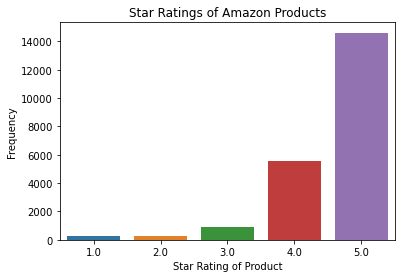

In [73]:
#let's create a countplot to see the reviews how many of each type of star reviews there are
sns.countplot(x='reviews_rating', data=df)
plt.xlabel('Star Rating of Product')
plt.ylabel('Frequency')
plt.title('Star Ratings of Amazon Products')
plt.show()

There seem to be very few ratings under 5 stars, which is understandable as Amazon electronics are pretty well received by people, but this may not be very good news for a machine learning model as the data is very unbalanced, when observing classification reports, I would need to focus more on other performance metrics other than accuracy

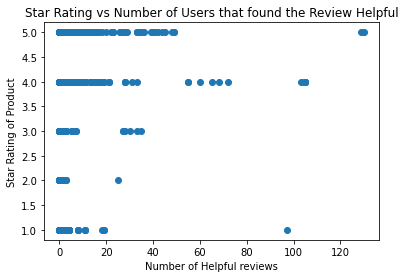

In [74]:
plt.scatter(x = df['reviews_numHelpful'], y = df['reviews_rating'])
plt.xlabel('Number of Helpful reviews')
plt.ylabel('Star Rating of Product')
plt.title('Star Rating vs Number of Users that found the Review Helpful')
plt.show()

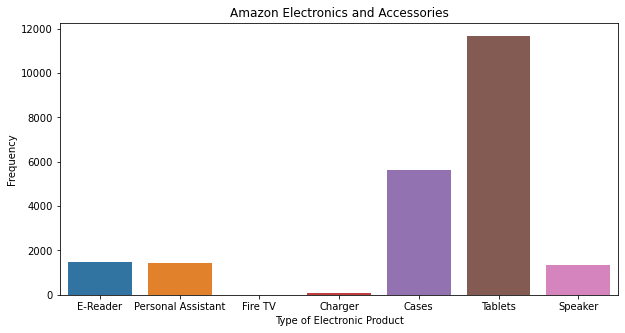

In [75]:
#see the frequency of our primary categories
plt.figure(figsize=(10,5))
sns.countplot(x='primary_category', data=df)
plt.xlabel('Type of Electronic Product')
plt.ylabel('Frequency')
plt.title('Amazon Electronics and Accessories')
plt.show()

A majority of products listed are either tablets or cases

In [76]:
#make plots of categories of the products along with their ratings
ereader = df.loc[df['primary_category']=='E-Reader']

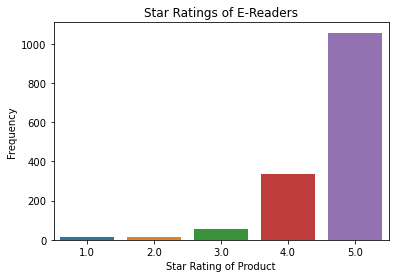

In [77]:
#let's create a countplot to see the reviews how many of each type of star reviews there are for e-readers
sns.countplot(x='reviews_rating', data=ereader)
plt.xlabel('Star Rating of Product')
plt.ylabel('Frequency')
plt.title('Star Ratings of E-Readers')
plt.show()

In [78]:
tablets = df.loc[df['primary_category']=='Tablets']

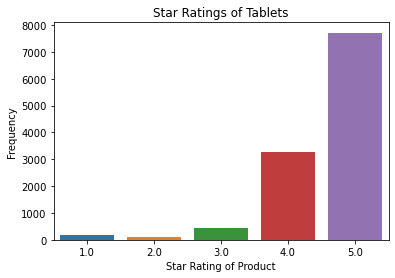

In [79]:
sns.countplot(x='reviews_rating', data=tablets)
plt.xlabel('Star Rating of Product')
plt.ylabel('Frequency')
plt.title('Star Ratings of Tablets')
plt.show()

In [80]:
alexa = df.loc[df['primary_category']=='Personal Assistant']

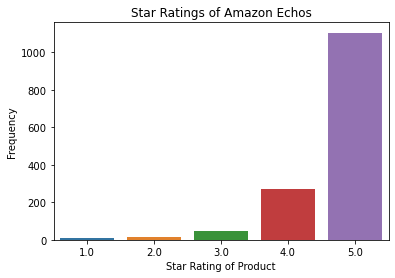

In [81]:
sns.countplot(x='reviews_rating', data=alexa)
plt.xlabel('Star Rating of Product')
plt.ylabel('Frequency')
plt.title('Star Ratings of Amazon Echos')
plt.show()

In [82]:
#separate electronics from the cases
electronics_df = df.loc[df['primary_category']!='Cases']

In [83]:
electronics_df.head()

,id,name,asins,brand,categories,manufacturer,manufacturerNumber,reviews_date,reviews_doRecommend,reviews_numHelpful,reviews_rating,reviews_text,reviews_title,not_recommended,recommended,tokenized_name,primary_category
0,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,False,0.0,3.0,I thought it would be as big as small paper bu...,Too small,1,0,"[amazon, kindle, ereader, 6, wifi, 8th, genera...",E-Reader
1,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,True,0.0,5.0,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,0,1,"[amazon, kindle, ereader, 6, wifi, 8th, genera...",E-Reader
2,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2018-04-20T00:00:00.000Z,True,0.0,4.0,Didnt know how much i'd use a kindle so went f...,Great for the price,0,1,"[amazon, kindle, ereader, 6, wifi, 8th, genera...",E-Reader
3,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2017-11-02T17:33:31.000Z,True,3.0,5.0,I am 100 happy with my purchase. I caught it o...,A Great Buy,0,1,"[amazon, kindle, ereader, 6, wifi, 8th, genera...",E-Reader
4,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2018-04-24T00:00:00.000Z,True,0.0,5.0,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,0,1,"[amazon, kindle, ereader, 6, wifi, 8th, genera...",E-Reader


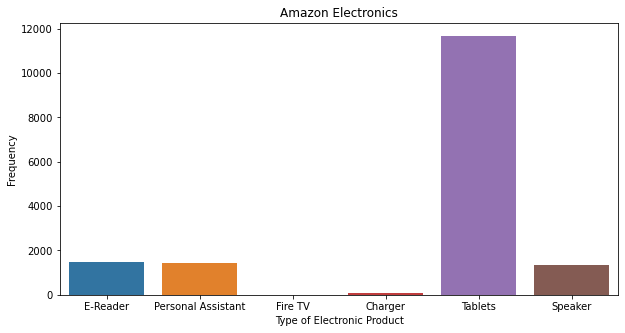

In [84]:
#see the electronics distribution eithout cases
plt.figure(figsize=(10,5))
sns.countplot(x='primary_category', data=electronics_df)
plt.xlabel('Type of Electronic Product')
plt.ylabel('Frequency')
plt.title('Amazon Electronics')
plt.show()

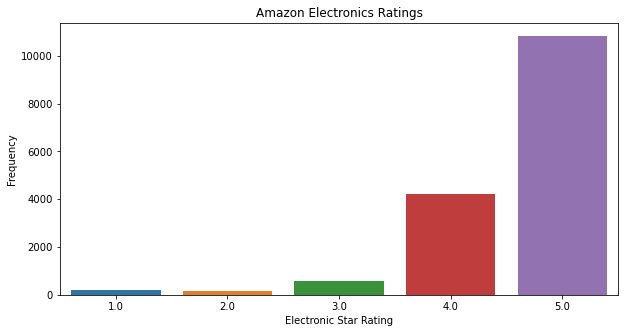

In [85]:
plt.figure(figsize=(10,5))
sns.countplot(x='reviews_rating', data=electronics_df)
plt.xlabel('Electronic Star Rating')
plt.ylabel('Frequency')
plt.title('Amazon Electronics Ratings')
plt.show()

In [86]:
#make a df of only 5 star reviews
five_star = df.loc[df['reviews_rating']==5.0]

## Next Steps
Next I am going to pre-process my text, to look at text patterns and create models and compare said models. NLP requires significantly less EDA than other problems. Since the data is imbalanced, I can observe more text patterns. When performing cross validation, I need to keep in mind that accuracy is not the best way to see patterns in the data

In [88]:
df.to_csv('../data/amazon_reviews.csv')
five_star.to_csv('../data/amazon_5reviews.csv')